In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


***Class = 0 → Normal transaction***
***Class = 1 → Fraud***

#### But for DBSCAN:

 **You must DROP this column**
 
Because:
DBSCAN is unsupervised  
- If we use Class → it becomes cheating  
However:  
- After clustering, we can use this ONLY to verify:  
- “Did DBSCAN actually isolate fraud as noise?”  

In [6]:
my_df=df.iloc[:,0:30]

In [7]:
my_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [8]:
my_df.columns.tolist()

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [9]:
my_df.info()##no null values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
my_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [11]:
my_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000


In [12]:
##Need to featuere scaling 
# DBSCAN uses Euclidean distance.

# PCA features (V1–V28) are already scaled

# Amount is not scaled → if not scaled, DBSCAN may give it too much weight

In [13]:
from sklearn.preprocessing import StandardScaler 
scaler=StandardScaler()

In [14]:
X_scaled=scaler.fit_transform(my_df)

In [15]:
sg=pd.DataFrame(X_scaled,columns=my_df.columns)
sg.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [16]:
##pca for visualization 
# High-dimensional distance may lose meaning (curse of dimensionality)

# Visualizing clusters in 2D or 3D helps understand density

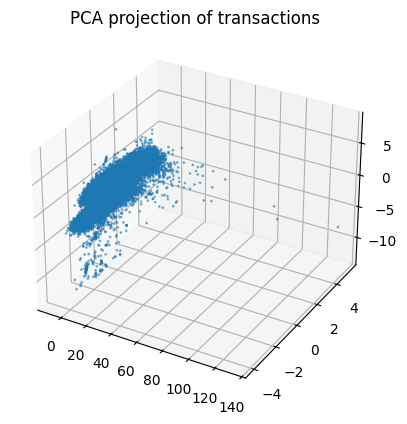

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=1, alpha=0.5)
ax.set_title("PCA projection of transactions")
plt.show()
# ax is a 3D axes object from Matplotlib that represents the 3D plotting area within the figure.

In [18]:
# # DBSCAN has eps (neighborhood radius) and min_samples (minimum points to form dense cluster)

# # Isolated points = -1 → candidate anomalies
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=3, min_samples=10)  # initial guess
# labels = dbscan.fit_predict(X_scaled)
# my_df['dbscan_label'] = labels
# print("Cluster counts:\n", my_df['dbscan_label'].value_counts())


### kernel died

**we have ~285k rows and 29 features.**

***DBSCAN is O(n²) in time/memory in its naive implementation (scikit-learn uses some optimizations, but high dimensionality + large n can still crash).***

***eps=3 may create a huge number of distance computations internally.***

***machine probably ran out of RAM, causing the kernel to die.***


In [19]:
# ##so we will be using isolation Forest 
# time complexity is O(n log n)

# Scales to millions of rows

# Designed exactly for anomaly detection

# Used in banks, fintech, cybersecurity

In [20]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(
    n_estimators=200,
    contamination=0.0017,  # matches real fraud ratio ~0.17%
    random_state=42,##so that it gonna show the same anamolies everytime.
    n_jobs=-1
)

iso.fit(X_scaled)


,n_estimators,200
,max_samples,'auto'
,contamination,0.0017
,max_features,1.0
,bootstrap,False
,n_jobs,-1
,random_state,42
,verbose,0
,warm_start,False


In [21]:
iso_labels = iso.predict(X_scaled)
my_df['iso_label'] = iso_labels
##-1 = suspected fraud
##1 = normal transaction

In [23]:
#how many anamalies 
my_df['iso_label'].value_counts()



iso_label
 1    284322
-1       485
Name: count, dtype: int64

In [24]:
##let's check anamoly score 
scores = iso.decision_function(X_scaled)
my_df['anomaly_score'] = scores


In [25]:
my_df.head()
#
#Lower score → more suspicious.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,iso_label,anomaly_score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,1,0.277430
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1,0.285092
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,1,0.193334
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,1,0.254249
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,1,0.266332


In [27]:
my_df.sort_values('anomaly_score').head(10)
##top 10 most suspicious transactions in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,iso_label,anomaly_score
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,-1,-0.119301
173353,121450.0,-28.262775,-26.551515,-15.930586,6.945207,-19.203497,13.461737,23.718783,-9.419314,5.264773,...,-2.932575,-22.459170,1.771003,-3.684737,-0.106886,4.071877,-2.383081,4861.64,-1,-0.117771
173054,121340.0,-22.132223,-19.815536,-11.183644,4.829787,-13.128465,10.689779,18.257057,-8.685409,5.250410,...,-1.969170,-18.416215,1.376122,-2.965101,0.149369,4.077221,-1.975801,4543.64,-1,-0.106015
176335,122723.0,-35.274010,-34.889342,-15.070015,9.211564,-6.226835,3.828063,10.778805,-6.462003,6.588395,...,-4.722186,-26.429741,1.765486,-4.564506,-0.594620,1.110848,-0.714247,1676.60,-1,-0.105051
206255,136137.0,-40.042537,-38.430842,-21.277176,10.527243,-16.296090,8.799515,19.553200,-6.221785,6.121324,...,-3.834799,-20.034848,1.575385,-4.196468,-0.851794,0.375152,-1.178134,1676.60,-1,-0.103387
206228,136124.0,-37.054295,-35.699829,-19.880878,9.552849,-16.701866,9.741883,21.014587,-6.414390,5.751017,...,-2.817629,-14.414207,1.223594,-3.129609,-0.689271,0.289897,-1.181892,1676.60,-1,-0.102695
231454,146772.0,-35.905105,-31.041362,-19.472908,9.216960,-18.863553,10.713326,16.687265,-9.609234,3.296559,...,-3.016337,-19.331255,0.987774,-2.180899,-0.172480,6.228140,-2.830091,3552.96,-1,-0.100976
220090,142019.0,-37.558067,-29.335992,-24.962322,8.413616,-35.182120,21.550496,36.877368,-8.915982,5.046566,...,-1.150828,-7.800902,1.272716,1.965365,0.767817,3.248189,13.013546,5964.95,-1,-0.100932
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,-1,-0.098579
74699,55709.0,-16.950064,-16.417395,-12.523381,6.555638,-27.752964,18.072031,28.504065,-10.152220,2.124673,...,0.050097,-10.855949,1.550407,-0.502172,0.821714,12.152401,-4.009839,8790.26,-1,-0.093978


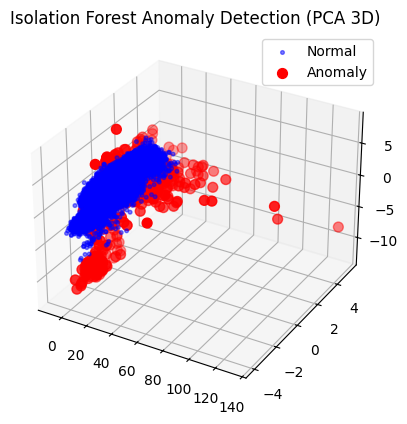

In [30]:
##outliers visualization 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Normal points
ax.scatter(
    X_pca[iso_labels == 1, 0],
    X_pca[iso_labels == 1, 1],
    X_pca[iso_labels == 1, 2],
    s=7,
    alpha=0.5,
    label="Normal",
    color="blue"
)

# Anomalies
ax.scatter(
    X_pca[iso_labels == -1, 0],
    X_pca[iso_labels == -1, 1],
    X_pca[iso_labels == -1, 2],
    s=50,
    label="Anomaly",
    color="red"
)

ax.set_title("Isolation Forest Anomaly Detection (PCA 3D)")
ax.legend()
plt.show()
# X_pca[iso_labels == 1, 0]
## step1--
# iso_labels == 1
# creates a mask like;
# [ True  True  True False True False ... ]
# where True--normalpoint else not normal
## step2
# X_pca[iso_labels == 1, 0]
# ✅ "Gives ONLY the rows where iso_labels == 1"
# ✅ "From those rows, give column 0"






In [32]:
df['iso_label']=iso_labels

In [34]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,iso_label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1


In [35]:
###Now verification using class for evaluation 
pd.crosstab(df['Class'], df['iso_label'])


iso_label,-1,1
Class,,
0,361,283954
1,124,368


| Actual \ Predicted   | Anomaly (-1) | Normal (1)   |
| -------------------- | ------------ | ------------ |
| **Class 0 (Normal)** | 361 (FP)     | 283,954 (TN) |
| **Class 1 (Fraud)**  | 124 (TP)     | 368 (FN)     |

**TP = True Positive (fraud correctly caught)  
FP = False Positive (normal wrongly flagged)  
TN = True Negative (normal correctly ignored)  
FN = False Negative (fraud missed)**

In [37]:
# ##Precision and Recall
# from sklearn.metrics import classification_report
# print(classification_report(df['Class'], df['iso_label'] == -1))
